Building a simple Perceptron classifier. The class computes weights for given binary classification problem

In [19]:
import numpy as np
class Perceptron(object):
    """Perceptron classifier.

    Parameters
    ------------
    eta : float
        Learning rate (between 0.0 and 1.0)
    n_iter : int
        Passes over the training dataset.

    Attributes
    -----------
    w_ : 1d-array
        Weights after fitting.
    errors_ : list
        Number of misclassifications in every epoch.

    """
    def __init__(self, eta=0.01, n_iter=10):
        self.eta = eta
        self.n_iter = n_iter

    def fit(self, X, y):
        """Fit training data.

        Parameters
        ----------
        X : {array-like}, shape = [n_samples, n_features]
            Training vectors, where n_samples is the number of samples and
            n_features is the number of features.
        y : array-like, shape = [n_samples]
            Target values.

        Returns
        -------
        self : object

        """
        self.w_ = np.zeros(1 + X.shape[1])
        self.errors_ = []

        for _ in range(self.n_iter):
            errors = 0
            for xi, target in zip(X, y):
                update = self.eta * (target - self.predict(xi))
                self.w_[1:] += update * xi
                self.w_[0] += update
                errors += int(update != 0.0)
            self.errors_.append(errors)
        return self

    def net_input(self, X):
        """Calculate net input"""
        return np.dot(X, self.w_[1:]) + self.w_[0]

    def predict(self, X):
        """Return class label after unit step"""
        return np.where(self.net_input(X) >= 0.0, 1, -1)

Train the perceptron using example from iris data set

/Users/admin/anaconda3/lib/python3.5/site-packages/matplotlib/collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


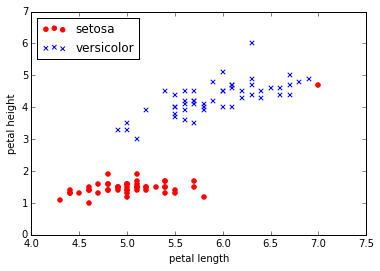

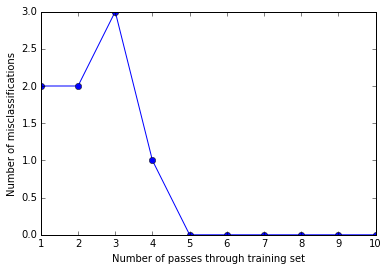

In [22]:
import pandas as pd
import numpy as np 
import matplotlib.pylab as plt
#read data and look at first and last 5 rows
df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data')
df.tail()
df.head()

#since we want to do binary classification, retain only first 100 rows of data that 
#refers to features for Versicolor and Setosa flowers
#set target variable
target = df.iloc[0:100, 4].values
target = np.where(target == 'Iris-setosa', -1, 1)

#set feature / predictor variable. For our purposes, we are only
#going to be using two features: petal length and sepal length
X = df.iloc[0:100, [0, 2]].values

#create a plot of features vs predictor
plt.scatter(X[:50, 0], X[:50, 1], 
    color = 'red', marker = 'o', label = 'setosa')
plt.scatter(X[50:, 0], X[50:, 1], 
    color = 'blue', marker = 'x', label = 'versicolor')
plt.xlabel('petal length')
plt.ylabel('petal height')
plt.legend(loc = 'upper left')
plt.show()

ppn = Perceptron(eta = 0.1, n_iter = 10)
ppn.fit(X, target)
plt.plot(range(1, len(ppn.errors_) + 1), ppn.errors_, marker = 'o')
plt.xlabel('Number of passes through training set')
plt.ylabel('Number of misclassifications')
plt.show()

Function to plot all observations and decision boundary created by a given classifier

/Users/admin/anaconda3/lib/python3.5/site-packages/matplotlib/collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


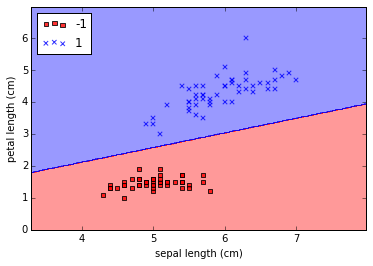

In [25]:
############################Plot decision boundary for classifier#########
from matplotlib.colors import ListedColormap

def plt_decision_regions(X, y, classifier, resolution = 0.02):
    markers = ('s', 'x', 'o', '^', 'v')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])

    #plot decision surface
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution), 
        np.arange(x2_min, x2_max, resolution))
    z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    z = z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, z, alpha = 0.4, cmap = cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())

    #plot class samples
    for idx, c1 in enumerate(np.unique(y)):
        plt.scatter(x = X[y == c1, 0], y = X[y == c1, 1], 
            alpha = 0.8, c = cmap(idx), marker = markers[idx], label = c1)

plt_decision_regions(X, target, classifier = ppn)
plt.xlabel('sepal length (cm)')
plt.ylabel('petal length (cm)')
plt.legend(loc = 'upper left')
plt.show()


Implement class for classification using Batch Gradient Descent algorithm

In [3]:
class BatchGradientDescent(object):
    """Gradient Descent Classifier

    Parameters
    -----------
    eta : float
        Learning rate (between 0.0 and 1.0)
    n_iter : int
        Number of passes over training data set (0 to Inf)


    Attributes
    -----------
    w_ : 1d-array
        Weights after fitting
    errors_ : list
        Number of misclassification errors
    """

    def __init__(self, eta = 0.01, n_iter = 50):
        self.eta = eta
        self.n_iter = n_iter

    def fit(self, X, y):
        """Fit training data.

        Parameters
        -----------
        X : array of shape = [n_samples, n_features]
            Training vectors where n_samples is number of observations and
            n_features is number of predictors
        y: array of shape = [n_samples]
            Vector of target values

        Returns
        --------
        self: object
        """

        #initialize all weights to 0
        self.w_ = np.zeros(1 + X.shape[1])
        self.cost_ = []

        for i in range(self.n_iter):
            output = self.net_input(X)
            errors = (y - output)
            self.w_[1:] += self.eta * X.T.dot(errors)
            self.w_[0] += self.eta * errors.sum()
            cost = (errors ** 2).sum()
            self.cost_.append(cost)
        return self

    def net_input(self, X):
        """Calculate net input"""
        return np.dot(X, self.w_[1:]) + self.w_[0]

    def activation(self, X):
        """Compute linear activation"""
        return self.net_input(X)

    def predict(self, X):
        """Return class label after unit step"""
        return np.where(self.activation(X) >= 0.0, 1, -1)

Train multiple classifiers with Gradient Descent using different learning rates and plot the results including decision boundary and observations from dataset

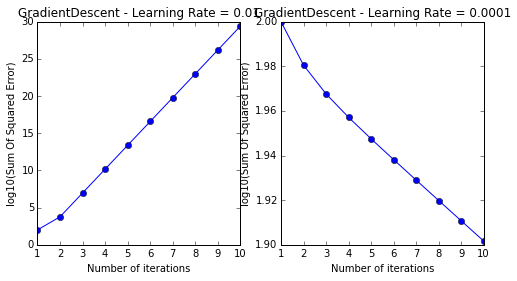

/Users/admin/anaconda3/lib/python3.5/site-packages/matplotlib/collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


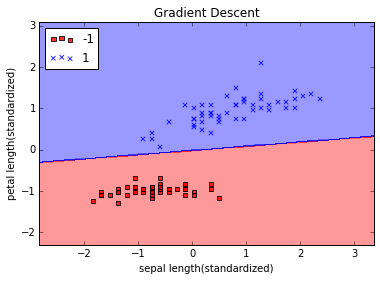

In [26]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np 

#read data and look at first and last 5 rows
df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data')
df.tail()
df.head()

#since we want to do binary classification, retain only first 100 rows of data that 
#refers to features for Versicolor and Setosa flowers
#set target variable
y = df.iloc[0:100, 4].values
y = np.where(y == 'Iris-setosa', -1, 1)

#set feature / predictor variable. For our purposes, we are only
#going to be using two features: petal length and sepal length
X = df.iloc[0:100, [0, 2]].values


fig, ax = plt.subplots(nrows = 1, ncols = 2, figsize = (8, 4))

#implement first gradient desecent with learning rate = 0.01
gd1 = BatchGradientDescent(eta = 0.01, n_iter = 10).fit(X, y)
ax[0].plot(range(1, len(gd1.cost_) + 1), np.log10(gd1.cost_), marker = 'o')
ax[0].set_xlabel('Number of iterations')
ax[0].set_ylabel('log10(Sum Of Squared Error)')
ax[0].set_title('GradientDescent - Learning Rate = 0.01')

#implement second gradient desecent with learning rate = 0.0001
gd2 = BatchGradientDescent(eta = 0.0001, n_iter = 10).fit(X, y)
ax[1].plot(range(1, len(gd2.cost_) + 1), np.log10(gd2.cost_), marker = 'o')
ax[1].set_xlabel('Number of iterations')
ax[1].set_ylabel('log10(Sum Of Squared Error)')
ax[1].set_title('GradientDescent - Learning Rate = 0.0001')

plt.show()

# ###########implementing GradientDescent using standardized values of X#######

#standardize X 
X_std = np.copy(X)
X_std[:, 0] = (X[:, 0] - X[:, 0].mean()) / X[:, 0].std()
X_std[:, 1] = (X[:, 1] - X[:, 1].mean()) / X[:, 1].std()

#implement Gradient Descent using standardized X
grad_desc = BatchGradientDescent(eta = 0.01, n_iter = 15)
grad_desc.fit(X_std, y)

#plot observations and decision boundary
plt_decision_regions(X_std, y, classifier = grad_desc)
plt.title('Gradient Descent')
plt.xlabel('sepal length(standardized)')
plt.ylabel('petal length(standardized)')
plt.legend(loc = 'upper left')
plt.show()

# #plot number of iterations vs cost at every iteration
# plt.plot(range(1, len(grad_desc.cost_) + 1), grad_desc.cost_, marker = 'o')
# plt.xlabel('Number of iterations')
# plt.ylabel('SSE')
# plt.show()

Implement class to build classification mechanism using stochastic gradient descent

In [31]:
import numpy as np
from numpy.random import seed

class stochasticGradientDescent(object):
    """Stochastic Gradient Descent Class

    Parameters
    -----------
    eta : float
        Learning rate (between 0.0 and 1.0)
    n_iter : int
        Number of passes over training dataset

    Attributes
    ----------
    w_ : 1d-array
        Weights after fitting
    errors : list
        Number of misclassification errors
    shuffle: bool (default: True)
        shuffles training data at every iteration in order to 
        prevent cycles
    random_state : int (default: None)
        Set random state for shuffling and initializing weights 
    """
    def __init__(self, eta = 0.01, n_iter = 10, shuffle = True, random_state = None):
        self.eta = eta
        self.n_iter = n_iter
        self.w_initialized = False
        self.shuffle = shuffle

        if random_state:
            seed(random_state)

    def _shuffle(self, X, y):
        """Shuffle training data"""
        r = np.random.permutation(len(y))
        return X[r], y[r]

    def _initialize_weights(self, m):
        """Initialize weights to zeros"""
        self.w_ = np.zeros(1 + m)
        self.w_initialized = True

    def _update_weights(self, xi, target):
        """
        Apply Stochastic Gradient Descent learning rule to update
        weights 
        """
        output = self.net_input(xi)
        error = target - output
        self.w_[1:] += self.eta * xi.dot(error)
        self.w_[0] += self.eta * error
        cost = 0.5 * (error ** 2)
        return cost

    def fit(self, X, y):
        """
        Fit training data

        Parameters
        ----------
        X : array of shape = [n_samples, n_features]
            Training array where n_samples is number of 
            observations in dataset and n_features is the 
            number of predictors
        y : array of shape = [n_samples]
            Target vector

        Returns
        --------
        self : object
        """
        self._initialize_weights(X.shape[1])
        self.cost_ = []

        for i in range(self.n_iter):
            if self.shuffle:
                X, y = self._shuffle(X, y)
            cost = []
            for xi, target in zip(X, y):
                cost.append(self._update_weights(xi, target))
            avg_cost = sum(cost) / len(y)
            self.cost_.append(avg_cost)
        return self

    def partial_fit(self, X, y):
        """Fit training data without re-initializing weights"""
        if not self.w_initialized:
            self._initialize_weights(X.shape[1])
        if y.reval().shape[0] > 1:
            for xi, target in zip(X, y):
                self._update_weights(xi, target)
        else:
            self._update_weights(X, y)
        return self

    def net_input(self, X):
        """Calculate net input"""
        return np.dot(X, self.w_[1:]) + self.w_[0]

    def activation(self, X):
        """Compute linear activation"""
        return self.net_input(X)

    def predict(self, X):
        """Return class label after unit step"""
        return np.where(self.activation(X) >= 0.0, 1, -1)

Train a classifier with Stochastic Gradient Descent and plot the results including decision boundary and observations from dataset

/Users/admin/anaconda3/lib/python3.5/site-packages/matplotlib/collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


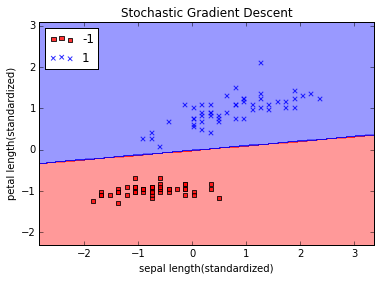

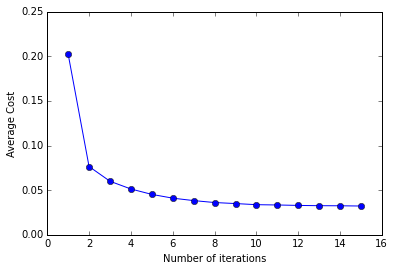

In [33]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np 

#read data and look at first and last 5 rows
df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data')
df.tail()
df.head()

#since we want to do binary classification, retain only first 100 rows of data that 
#refers to features for Versicolor and Setosa flowers
#set target variable
y = df.iloc[0:100, 4].values
y = np.where(y == 'Iris-setosa', -1, 1)

#set feature / predictor variable. For our purposes, we are only
#going to be using two features: petal length and sepal length
X = df.iloc[0:100, [0, 2]].values

#standardize X 
X_std = np.copy(X)
X_std[:, 0] = (X[:, 0] - X[:, 0].mean()) / X[:, 0].std()
X_std[:, 1] = (X[:, 1] - X[:, 1].mean()) / X[:, 1].std()

#train stochastic gradient descent model and plot the decision boundary
stochastic_gd = stochasticGradientDescent(eta = 0.01, n_iter = 15, random_state = 1)
stochastic_gd.fit(X_std, y)
plt_decision_regions(X_std, y, classifier = stochastic_gd)
plt.title('Stochastic Gradient Descent')
plt.xlabel('sepal length(standardized)')
plt.ylabel('petal length(standardized)')
plt.legend(loc = 'upper left')
plt.show()
plt.plot(range(1, len(stochastic_gd.cost_) + 1), stochastic_gd.cost_, 
     marker = 'o')
plt.xlabel ('Number of iterations')
plt.ylabel ('Average Cost')
plt.show()